# Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

import warnings
warnings.filterwarnings("ignore")

# Example of map visualization

Source:
- <a href="https://en.wikipedia.org/wiki/List_of_sovereign_states_in_Europe_by_GDP_(nominal)_per_capita">GDP data</a>

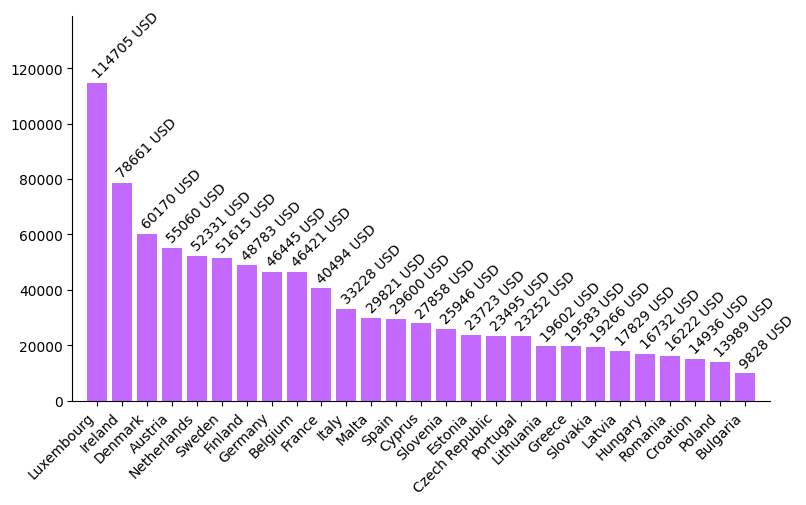

In [82]:
data = pd.read_csv("../data/eu_pkb_per_capita_by_country.csv")
data.sort_values("pkb_per_capita (USD)", inplace=True, ascending=False)
data.reset_index(drop=True, inplace=True)

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

plt.figure(figsize=(9, 5))
for i in range(len(data)):
    plt.bar(i, data.loc[i, "pkb_per_capita (USD)"], color="#c369ff")
    plt.text(i-0.3, data.loc[i, "pkb_per_capita (USD)"]+2000, f"{data.loc[i, "pkb_per_capita (USD)"]} USD", rotation=45, ha="left")
plt.xticks(np.arange(len(data)), data["country"], rotation=45, ha="right")
plt.xlim(-1, len(data))
plt.ylim(0, 139000)
plt.show()

In [41]:
geodata = gpd.read_file("../data/geojson/world_countries.json")
geodata.rename(columns={"name": "country"}, inplace=True)
data = pd.read_csv("../data/eu_pkb_per_capita_by_country.csv")
data["country"].replace("France", "France Without South America", inplace=True)

merged_data = pd.merge(data, geodata, on="country")
merged_data = gpd.GeoDataFrame(merged_data, geometry=merged_data['geometry'])
merged_data.head(3)

,country,pkb_per_capita (USD),id,geometry
0,Austria,55060,AUT,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
1,Belgium,46421,BEL,"POLYGON ((3.31497 51.34578, 4.04707 51.26726, ..."
2,Bulgaria,9828,BGR,"POLYGON ((22.65715 44.23492, 22.94483 43.82379..."


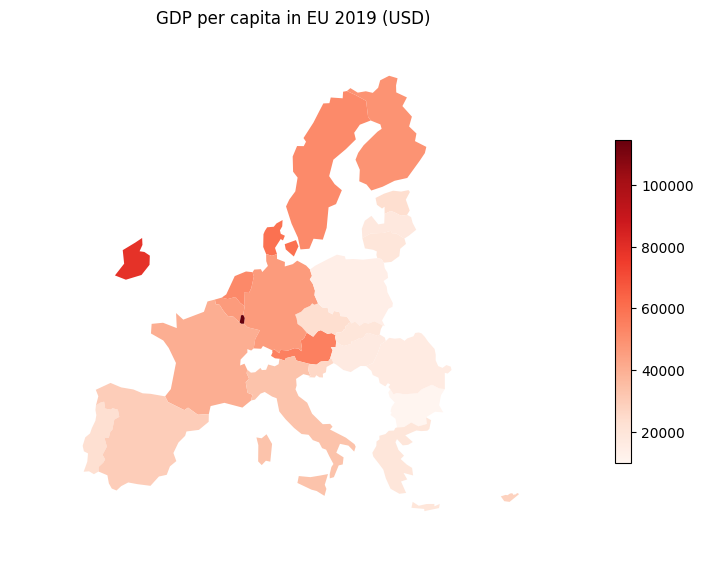

In [45]:
gplt.choropleth(
    merged_data,
    hue='pkb_per_capita (USD)',
    projection=gcrs.AlbersEqualArea(),
    figsize=(10, 7),
    cmap="Reds",
    legend=True,
    legend_kwargs={
        "shrink": 0.6
    }
)
plt.title("GDP per capita in EU 2019 (USD)")
plt.show()

# Map projections

### Mercator projection

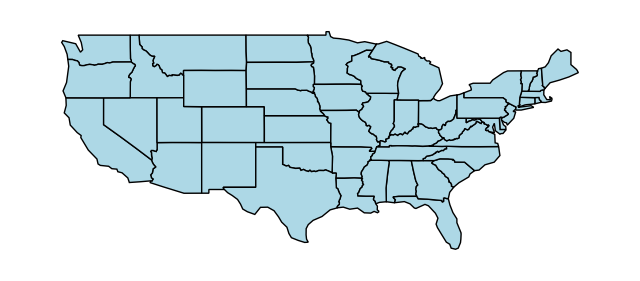

In [14]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(
    contiguous_usa,
    edgecolor='black',
    facecolor='lightblue',
    figsize=(8, 6)
)
plt.savefig("imgs/mercator_projection.png")

### Albers projection

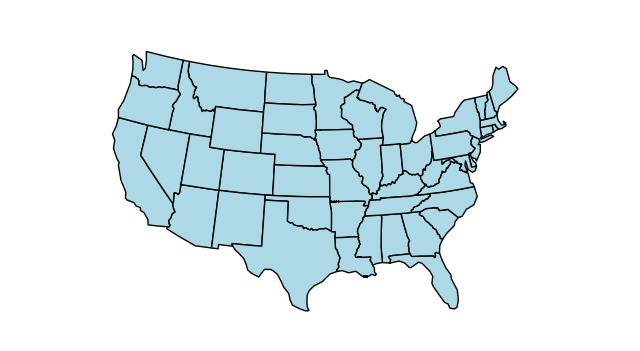

In [15]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
gplt.polyplot(
    contiguous_usa,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='black',
    facecolor='lightblue',
    figsize=(8, 6)
)
plt.savefig("imgs/albers_projection.png")